satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000  

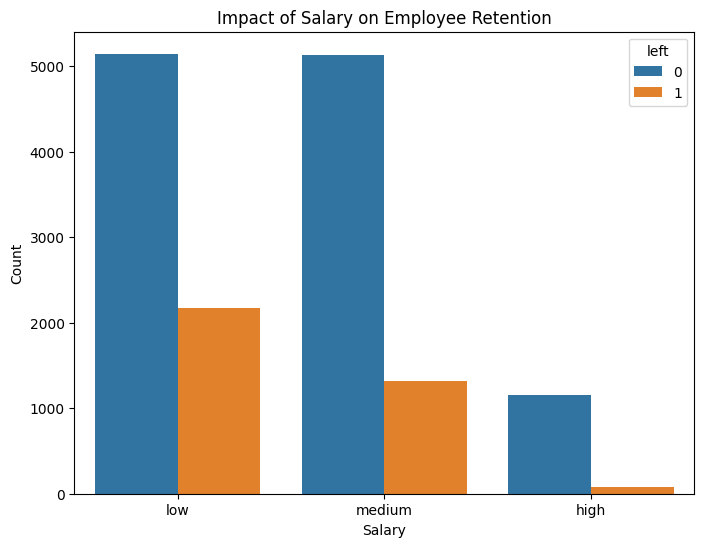

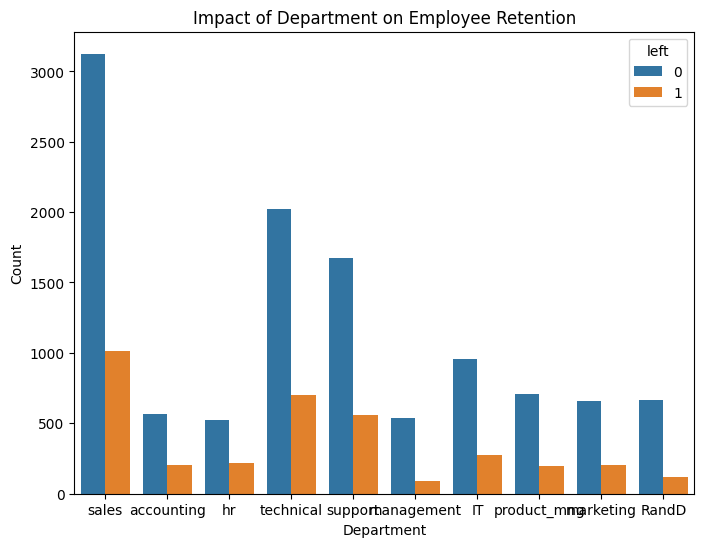

Accuracy of the Logistic Regression model: 0.7843
Confusion Matrix:
[[2116  178]
 [ 469  237]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/HR_comma_sep (2).csv')

# Step 1: Exploratory Data Analysis (EDA)

# Check for missing values and basic statistics
print(df.isnull().sum())
print(df.describe())

# Check the data types of columns
print(df.dtypes)

# Inspect the first few rows of the data
print(df.head())

# Step 2: Plotting bar charts to visualize the relationship between salary, department, and retention

# Plot bar chart for salary vs retention
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='salary', hue='left')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Plot bar chart for department vs retention
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Department', hue='left')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Step 3: Preprocessing data for Logistic Regression
# For simplicity, we will use 'satisfaction_level', 'last_evaluation', 'number_project',
# 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary'

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)

# Step 4: Define Features and Target
X = df_encoded.drop(columns=['left'])  # Features
y = df_encoded['left']  # Target variable (whether employee left the company)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the features (Logistic Regression works better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluate the Model's Performance

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.00


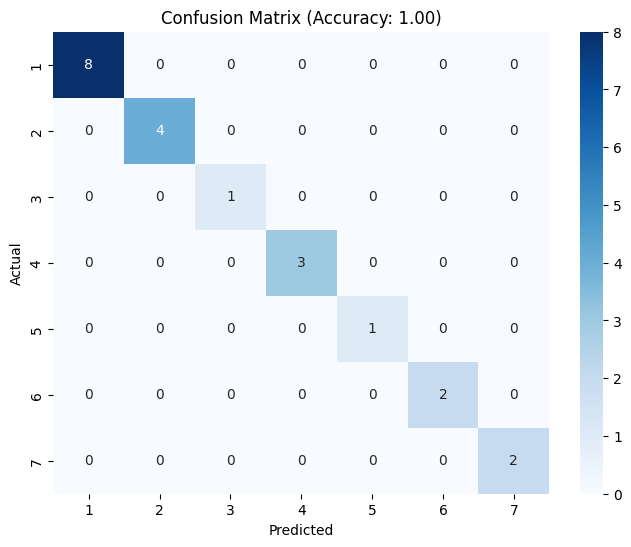

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load datasets
zoo_data_path = "/content/zoo-data (1).csv"
class_type_path = "/content/zoo-class-type (1).csv"

zoo_data = pd.read_csv(zoo_data_path)
class_type = pd.read_csv(class_type_path)

# Drop the 'animal_name' column
zoo_data_cleaned = zoo_data.drop(columns=['animal_name'])

# Split into features (X) and target (y)
X = zoo_data_cleaned.drop(columns=['class_type'])
y = zoo_data_cleaned['class_type']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()